# Optimisation and Evaluation
This notebook elaborates on the optimisation process:
- Test on the development set
- Get classification reports and confusion matrices
- Refine the systems accrodingly

Also the evaluation process:
- Re-evaluate on the test set
- Get classification reports and confusion matrices as the final results

In [2]:
import openai
import os
import json
import spacy
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


import utils

# 1. Rule-based System (Baseline Group)

## 1.1 Development Set

In [42]:
dev_path = './response_data/dataset/rule-based/dev.tsv'
dev_data = pd.read_csv(dev_path, delimiter='\t',encoding='utf-8')
pred_label_dev = dev_data['label']
print(len(pred_label_dev))

5695


In [43]:
gold_path = './response_data/dataset/annotation_dev_processed.tsv'
gold_data = pd.read_csv(gold_path, delimiter='\t',encoding='utf-8')
gold_label_dev = gold_data['label']
print(len(gold_label_dev))

5695


/Users/chuqiao/Desktop/Text_Mining/Thesis/Code/myvenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/chuqiao/Desktop/Text_Mining/Thesis/Code/myvenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/chuqiao/Desktop/Text_Mining/Thesis/Code/myvenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

Classification Report:
                precision    recall  f1-score   support

      B-event       0.19      0.88      0.31       192
B-participant       0.34      0.96      0.50       146
      B-place       0.00      0.00      0.00        20
       B-time       0.22      0.32      0.26       138
      I-event       0.29      0.31      0.30       494
I-participant       0.25      0.10      0.14        10
      I-place       0.00      0.00      0.00        44
       I-time       0.62      0.11      0.19       300
            O       0.83      0.68      0.75      4351

     accuracy                           0.62      5695
    macro avg       0.30      0.37      0.27      5695
 weighted avg       0.71      0.62      0.64      5695

Confusion matrix
[[ 169    0    0    2   10    0    0    0   11]
 [   0  140    0    0    1    0    0    0    5]
 [   0    0    0    0    0    0    0    0   20]
 [   1    0    0   44    1    0    0    2   90]
 [  55    2    0    6  154    0    0    3  274]
 

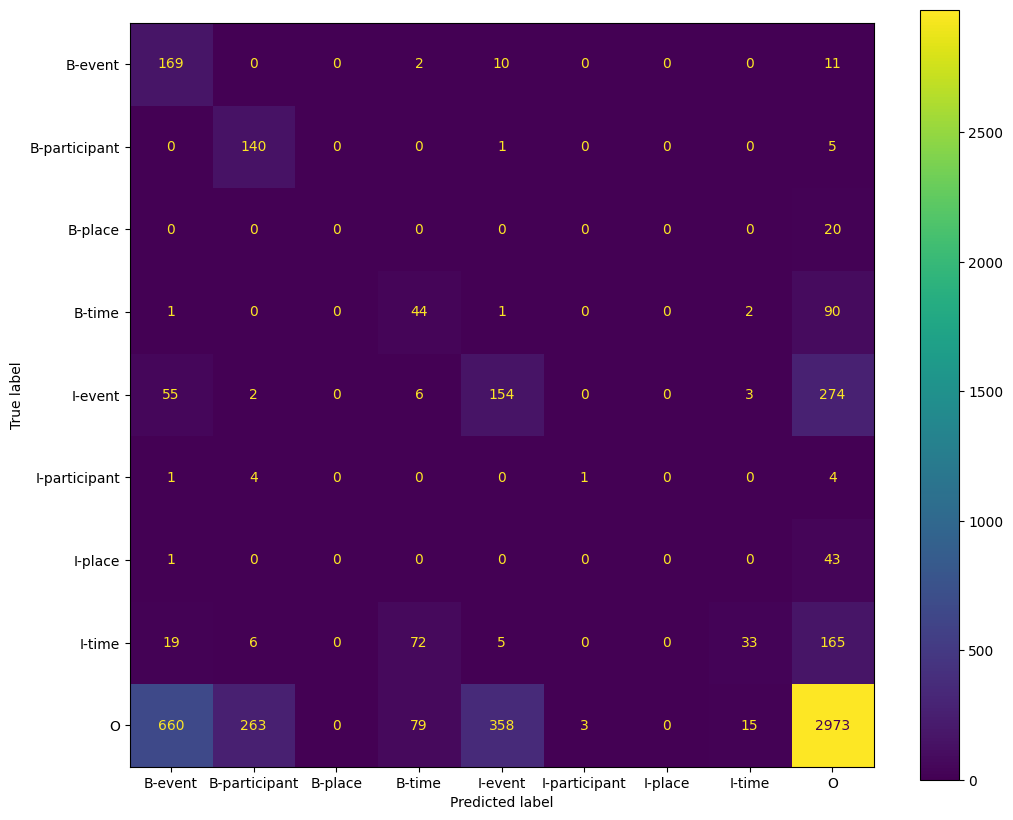

In [44]:
# Classification report
report = classification_report(gold_label_dev, pred_label_dev)
print("Classification Report:\n", report)

# Confusion matrix
conf_matrix = confusion_matrix(gold_label_dev, pred_label_dev, labels=np.unique(gold_label_dev))
print('Confusion matrix')
print(conf_matrix)

# Plot size
plot_size = plt.rcParams["figure.figsize"]
plot_size[0] = 12
plot_size[1] = 10
plt.rcParams["figure.figsize"] = plot_size 

# Display confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(gold_label_dev))
display.plot()

## 1.2 Optimisation: Add New Rules to Detect Places [ADV]

In [36]:
dev_path = './response_data/dataset/rule-based/improved_dev.tsv'
dev_data = pd.read_csv(dev_path, delimiter='\t',encoding='utf-8')
pred_label_dev = dev_data['label']
print(len(pred_label_dev))

5695


In [37]:
gold_path = './response_data/dataset/annotation_dev_processed.tsv'
gold_data = pd.read_csv(gold_path, delimiter='\t',encoding='utf-8')
gold_label_dev = gold_data['label']
print(len(gold_label_dev))

5695


Classification Report:
                precision    recall  f1-score   support

      B-event       0.18      0.86      0.30       192
B-participant       0.34      0.96      0.50       146
      B-place       0.04      0.55      0.08        20
       B-time       0.22      0.32      0.26       138
      I-event       0.29      0.30      0.29       494
I-participant       0.25      0.10      0.14        10
      I-place       0.09      0.14      0.11        44
       I-time       0.62      0.11      0.19       300
            O       0.86      0.65      0.74      4351

     accuracy                           0.59      5695
    macro avg       0.32      0.44      0.29      5695
 weighted avg       0.74      0.59      0.63      5695

Confusion matrix
[[ 165    0    4    2   10    0    0    0   11]
 [   0  140    0    0    1    0    0    0    5]
 [   0    0   11    0    0    0    0    0    9]
 [   1    0   29   44    1    0    3    2   58]
 [  53    2   44    6  149    0    7    3  230]
 

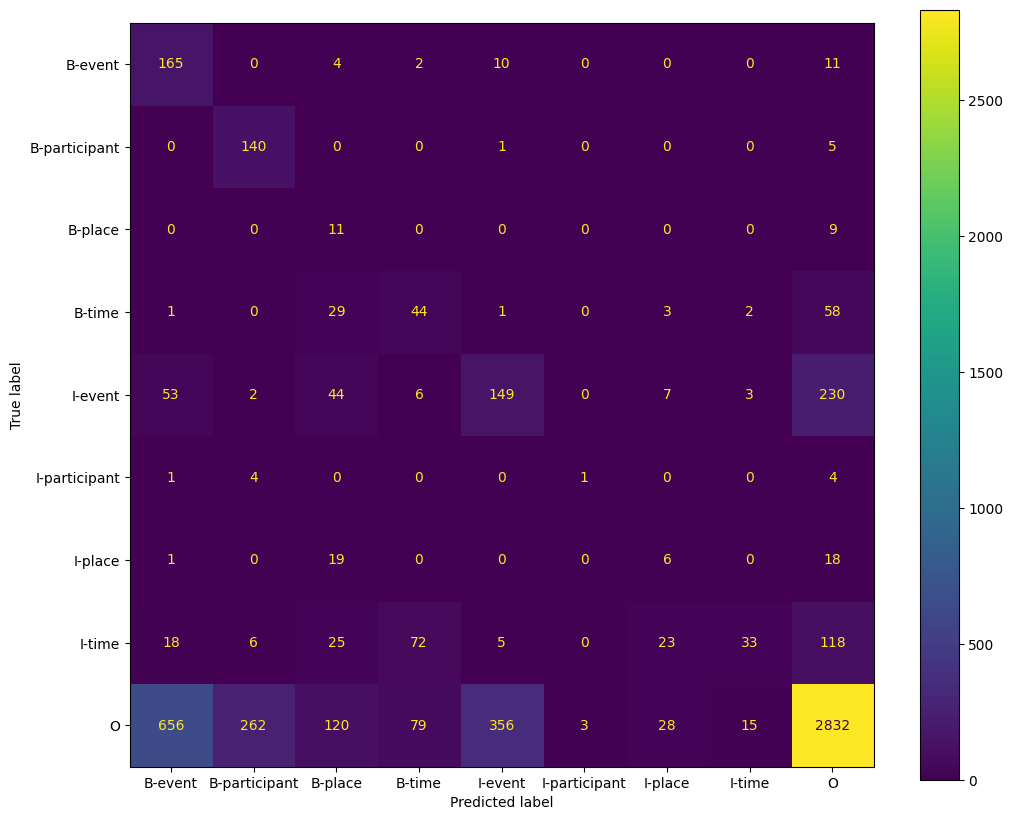

In [38]:
# Classification report
report = classification_report(gold_label_dev, pred_label_dev)
print("Classification Report:\n", report)

# Confusion matrix
conf_matrix = confusion_matrix(gold_label_dev, pred_label_dev, labels=np.unique(gold_label_dev))
print('Confusion matrix')
print(conf_matrix)

# Plot size
plot_size = plt.rcParams["figure.figsize"]
plot_size[0] = 12
plot_size[1] = 10
plt.rcParams["figure.figsize"] = plot_size 

# Display confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(gold_label_dev))
display.plot()

## 1.3 Performance on Test Set

In [39]:
test_path = './response_data/dataset/rule-based/improved_test.tsv'
test_data = pd.read_csv(test_path, delimiter='\t',encoding='utf-8')
pred_label_test = test_data['label']
print(len(pred_label_test))

6195


In [40]:
gold_path = './response_data/dataset/annotation_test_processed.tsv'
gold_data = pd.read_csv(gold_path, delimiter='\t',encoding='utf-8')
gold_label_test = gold_data['label']
print(len(gold_label_test))

6195


Classification Report:
                precision    recall  f1-score   support

      B-event       0.16      0.79      0.26       193
B-participant       0.31      0.94      0.46       161
      B-place       0.05      0.68      0.09        22
       B-time       0.16      0.30      0.21       135
      I-event       0.28      0.30      0.29       544
I-participant       0.30      0.33      0.32         9
      I-place       0.15      0.36      0.21        42
       I-time       0.45      0.06      0.10       288
            O       0.87      0.63      0.73      4801

     accuracy                           0.58      6195
    macro avg       0.30      0.49      0.30      6195
 weighted avg       0.74      0.58      0.62      6195

Confusion matrix
[[ 153    0   10    0   13    0    0    0   17]
 [   0  152    0    0    2    0    0    0    7]
 [   0    0   15    0    0    0    0    0    7]
 [   1    0   40   41    1    0    0    1   51]
 [  69    6   49    3  162    0    1    0  254]
 

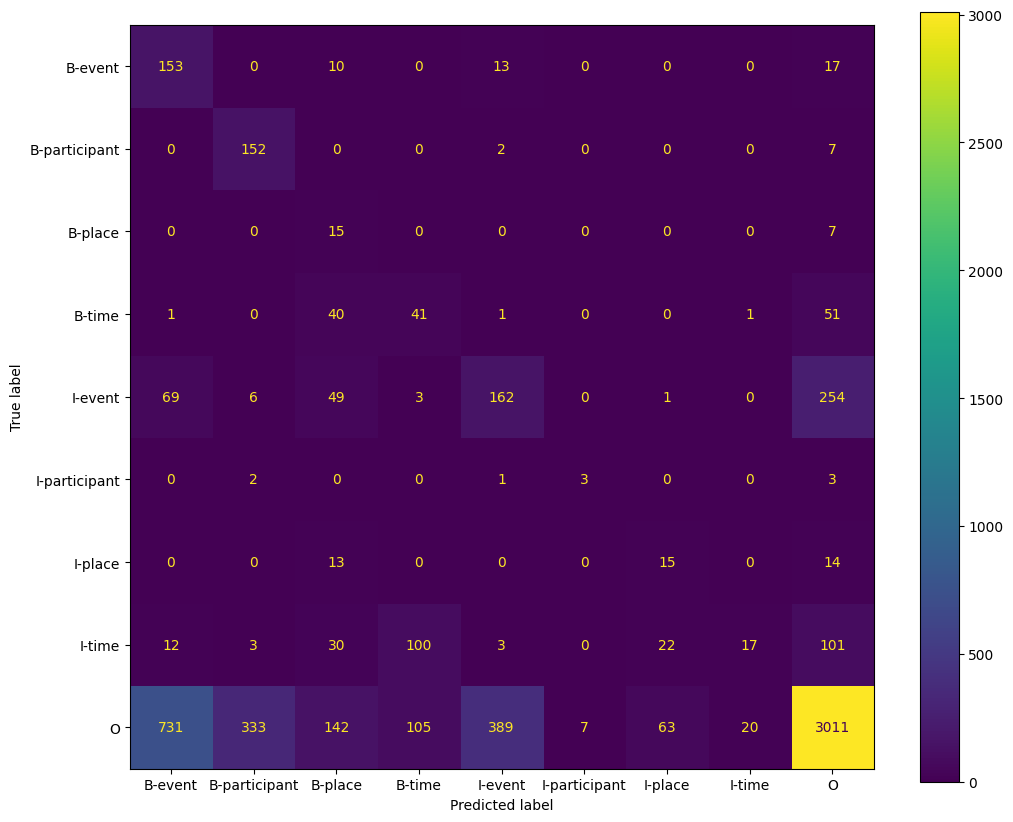

In [41]:
# Classification report
report = classification_report(gold_label_test, pred_label_test)
print("Classification Report:\n", report)

# Confusion matrix
conf_matrix = confusion_matrix(gold_label_test, pred_label_test, labels=np.unique(gold_label_test))
print('Confusion matrix')
print(conf_matrix)

# Plot size
plot_size = plt.rcParams["figure.figsize"]
plot_size[0] = 12
plot_size[1] = 10
plt.rcParams["figure.figsize"] = plot_size 

# Display confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(gold_label_test))
display.plot()

# 2. Fine-tuned Multi-lingual BERT (Experiment Group 1)

## 2.1 Test the Model on Development Set

Classification Report:
                precision    recall  f1-score   support

      B-event       0.63      0.67      0.65       192
B-participant       0.67      0.10      0.17       146
      B-place       0.30      0.30      0.30        20
       B-time       0.78      0.75      0.76       138
      I-event       0.63      0.73      0.68       494
I-participant       0.50      0.40      0.44        10
      I-place       0.53      0.45      0.49        44
       I-time       0.78      0.82      0.80       300
            O       0.92      0.93      0.92      4351

     accuracy                           0.86      5695
    macro avg       0.64      0.57      0.58      5695
 weighted avg       0.86      0.86      0.86      5695

Confusion matrix
[[ 128    0    0    0   14    0    0    1   49]
 [   0   14    0    0    0    1    0    1  130]
 [   0    0    6    1    5    0    0    0    8]
 [   0    1    0  104    3    0    0   11   19]
 [  13    1    3    0  361    0    4    3  109]
 

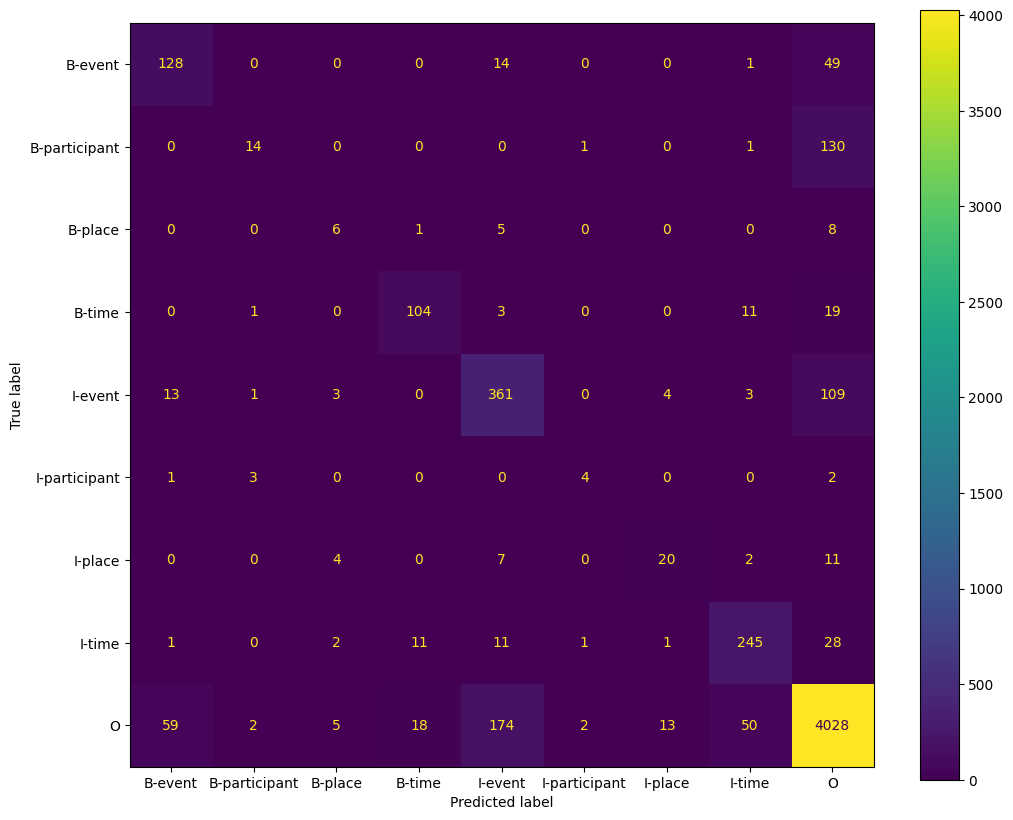

In [34]:
# Read the data
file_path = './response_data/dataset/bert_dev_predictions.tsv'
data = pd.read_csv(file_path, delimiter='\t', encoding='utf-8')

# Extract labels and predictions
labels = data['label']

# Correct typos (participants -> participant)
predictions = data['prediction'].replace({
    'B-participants': 'B-participant',
    'I-participants': 'I-participant'
})

# Classification report
report = classification_report(labels, predictions)
print("Classification Report:\n", report)

# Confusion matrix
conf_matrix = confusion_matrix(labels, predictions, labels=np.unique(labels))
print('Confusion matrix')
print(conf_matrix)

# Plot size
plot_size = plt.rcParams["figure.figsize"]
plot_size[0] = 12
plot_size[1] = 10
plt.rcParams["figure.figsize"] = plot_size 

# Display confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(labels))
display.plot()


## 2.2 Test Hyperparameter Tuned Model on Development Set
The learning rate has been altered from 1e-4 to 3e-5

Classification Report:
                precision    recall  f1-score   support

      B-event       0.68      0.67      0.67       192
B-participant       0.78      0.05      0.09       146
      B-place       0.28      0.25      0.26        20
       B-time       0.84      0.75      0.79       138
      I-event       0.64      0.74      0.69       494
I-participant       0.67      0.60      0.63        10
      I-place       0.55      0.52      0.53        44
       I-time       0.78      0.83      0.80       300
            O       0.92      0.93      0.92      4351

     accuracy                           0.87      5695
    macro avg       0.68      0.59      0.60      5695
 weighted avg       0.87      0.87      0.86      5695

Confusion matrix
[[ 128    0    0    0   19    0    0    1   44]
 [   0    7    0    0    1    0    0    1  137]
 [   0    0    5    1    3    0    0    0   11]
 [   0    0    0  104    4    0    0   13   17]
 [   7    1    2    0  368    0    4    3  109]
 

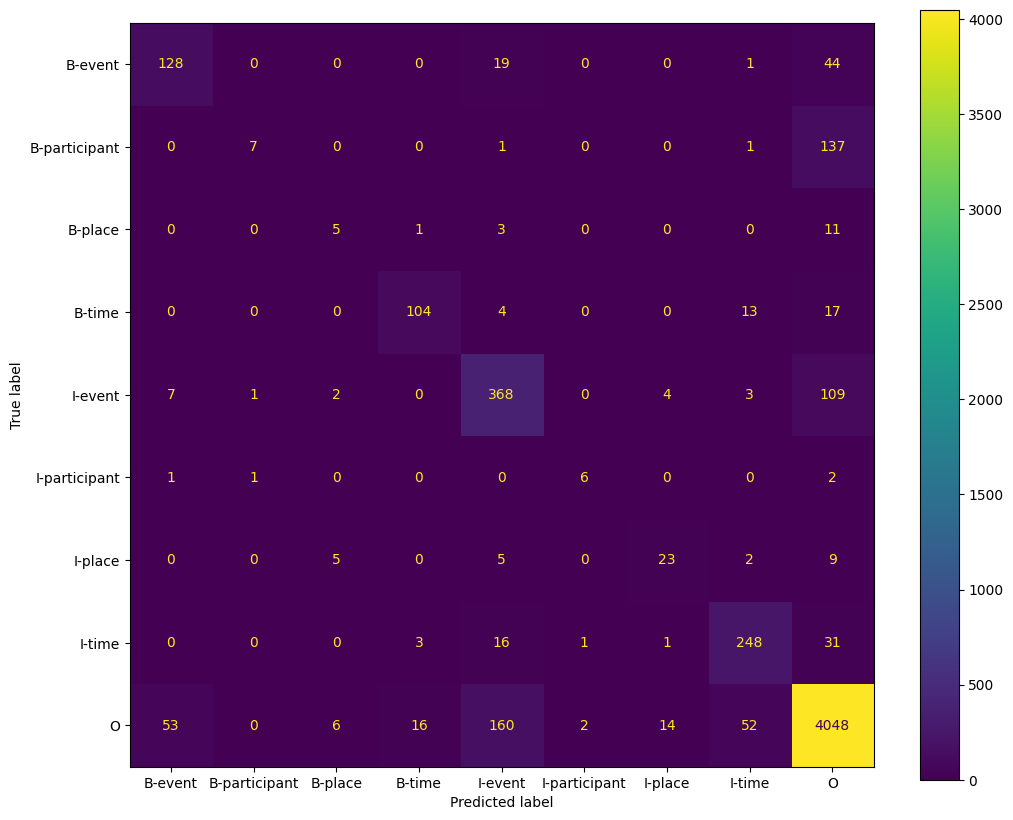

In [33]:
# Read the data
file_path = './response_data/dataset/bert_dev_predictions_tuned.tsv'
data = pd.read_csv(file_path, delimiter='\t', encoding='utf-8')

# Extract labels and predictions
labels = data['label']

# Correct typos (participants -> participant)
predictions = data['prediction'].replace({
    'B-participants': 'B-participant',
    'I-participants': 'I-participant'
})

# Classification report
report = classification_report(labels, predictions)
print("Classification Report:\n", report)

# Confusion matrix
conf_matrix = confusion_matrix(labels, predictions, labels=np.unique(labels))
print('Confusion matrix')
print(conf_matrix)

# Plot size
plot_size = plt.rcParams["figure.figsize"]
plot_size[0] = 12
plot_size[1] = 10
plt.rcParams["figure.figsize"] = plot_size 

# Display confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(labels))
display.plot()


## 2.3 Performance over Test Set

In [86]:
# Convert the test data to jsonl format
test_filepath = './response_data/dataset/annotation_test_processed.tsv'
test_jsonl = './response_data/jsonl_for_finetune/annotation_test.jsonl'

utils.convert_single_tsv_to_jsonl(test_filepath, test_jsonl)

Classification Report:
                precision    recall  f1-score   support

      B-event       0.67      0.67      0.67       193
B-participant       0.78      0.09      0.16       161
      B-place       0.22      0.18      0.20        22
       B-time       0.84      0.79      0.82       135
      I-event       0.63      0.68      0.66       544
I-participant       0.64      0.78      0.70         9
      I-place       0.56      0.52      0.54        42
       I-time       0.86      0.90      0.88       288
            O       0.92      0.94      0.93      4801

     accuracy                           0.88      6195
    macro avg       0.68      0.62      0.62      6195
 weighted avg       0.87      0.88      0.87      6195

Confusion matrix
[[ 130    0    0    1   17    0    0    0   45]
 [   0   14    0    0    3    0    0    0  144]
 [   0    0    4    0    4    0    1    0   13]
 [   1    0    0  107    6    0    0    7   14]
 [   8    1    1    1  372    0    5    5  151]
 

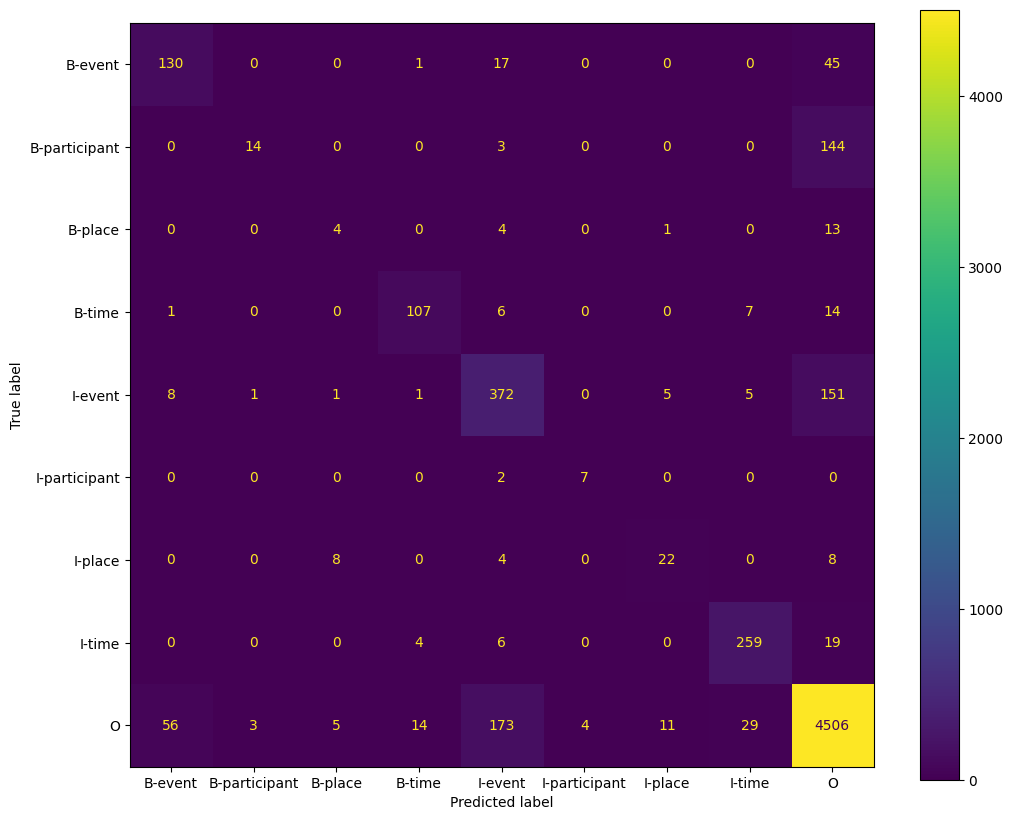

In [35]:
# Read the data
file_path = './response_data/dataset/bert_test_predictions.tsv'
data = pd.read_csv(file_path, delimiter='\t', encoding='utf-8')

# Extract labels and predictions
labels = data['label']

# Correct typos (participants -> participant)
predictions = data['prediction'].replace({
    'B-participants': 'B-participant',
    'I-participants': 'I-participant'
})

# Classification report
report = classification_report(labels, predictions)
print("Classification Report:\n", report)

# Confusion matrix
conf_matrix = confusion_matrix(labels, predictions, labels=np.unique(labels))
print('Confusion matrix')
print(conf_matrix)

# Plot size
plot_size = plt.rcParams["figure.figsize"]
plot_size[0] = 12
plot_size[1] = 10
plt.rcParams["figure.figsize"] = plot_size 

# Display confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(labels))
display.plot()


# 3. GPT-Prompting (Experiment Group 2)

## 3.1 Evaluation of the Development Set

In [9]:
# Read the data
gpt_file_path = './response_data/dataset/dev_gpt_4o_labelled.tsv'
output_gpt_file_dev = './response_data/dataset/dev_gpt_4o_labelled_processed.tsv'

gold_file_path = './response_data/dataset/annotation_dev_processed.tsv'

In [11]:
# Format the GPT-labelled data
data = pd.read_csv(gpt_file_path, delimiter='\t', encoding='utf-8')

# Get all 'event' columns
event_columns = [col for col in data.columns if col.startswith('event')]

# Define a function to calculate the new column 'label'
def process_label(row):
    events = row[event_columns].tolist()
    for event in events:
        if event != 'O':
            return event
    return 'O'

# Apply the function to create the new column 'label'
data['label'] = data.apply(process_label, axis=1)

# Fill NaN values in the 'label' column with 'O'
data['label'] = data['label'].fillna('O')


# Save to a new tsv file
result = data[['conversation', 'sent_id', 'token_id', 'token', 'label']]
result.to_csv(output_gpt_file_dev, sep='\t', index=False, encoding='utf-8')


In [12]:
data_gold = pd.read_csv(gold_file_path, delimiter='\t', encoding='utf-8')
data_gpt = pd.read_csv(output_gpt_file_dev, delimiter='\t', encoding='utf-8')

# Correct typos (participants -> participant)
data_gpt['label'] = data_gpt['label'].replace({
    'B-participants': 'B-participant',
    'I-participants': 'I-participant'
})



Classification Report:
                precision    recall  f1-score   support

      B-event       0.60      0.55      0.57       192
B-participant       0.64      0.18      0.29       146
      B-place       0.29      0.35      0.32        20
       B-time       0.78      0.65      0.71       138
      I-event       0.59      0.62      0.60       494
I-participant       0.71      0.50      0.59        10
      I-place       0.72      0.48      0.58        44
       I-time       0.83      0.75      0.79       300
            O       0.90      0.93      0.91      4351

     accuracy                           0.85      5695
    macro avg       0.67      0.56      0.60      5695
 weighted avg       0.84      0.85      0.84      5695

Confusion matrix
[[ 106    0    0    0   11    0    0    0   75]
 [   0   27    0    0    1    0    0    0  118]
 [   0    0    7    2    1    0    0    0   10]
 [   2    2    0   90    8    0    0    7   29]
 [  12    0    3    0  304    0    3    0  172]
 

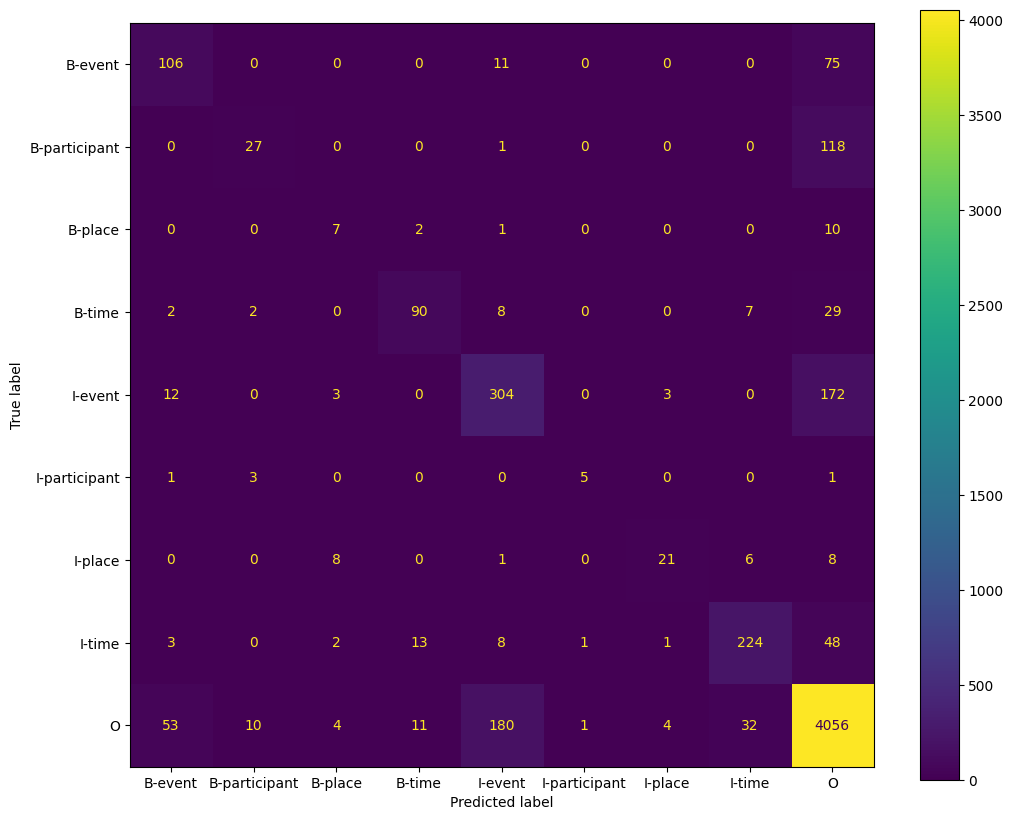

In [13]:
# Extract labels and predictions
labels = data_gold['label']
predictions = data_gpt['label']

# Classification report
report = classification_report(labels, predictions)
print("Classification Report:\n", report)

# Confusion matrix
conf_matrix = confusion_matrix(labels, predictions, labels=np.unique(labels))
print('Confusion matrix')
print(conf_matrix)

# Plot size
plot_size = plt.rcParams["figure.figsize"]
plot_size[0] = 12
plot_size[1] = 10
plt.rcParams["figure.figsize"] = plot_size 

# Display confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(labels))
display.plot()


## 3.2 Improve prompts and re-evaluate the improved dev data

### 3.2.1 Improve prompts

Because of the bad performance on "participant" and "place", a new version of prompt is applied.

In this prompt:\
1. Specify the patient him/herself as "participant"
2. Include the preposition preceding "place" into the "place" category

In [3]:
openai.api_key = '' # Enter OpenAI API key
print("OpenAI API Key: {}".format(openai.api_key))

OpenAI API Key: 


In [15]:
# Add detailed prompt to specify the participant and preposition preceding place

def gpt_label_zeroshot(conversations, MODEL="gpt-4o"):
    activity_dict = {}

    for i, con in enumerate(conversations):
            conversation_index = i + 1
            print(f"Processing conversation {conversation_index}/{len(conversations)}")
            # print(con)
            query = [
                {"role": "system", "content": "You are an expert in healthcare. I will provide you some conversations between\
                 a chatbot and an elderly person. Please extract the information contained in each conversation: \
                'activity index', 'activity', 'participant', 'place', and 'time', and format every activity as a list."},
                {"role": "system", "content": "Each token in the conversation is provided with three information:\
                 conversation id, sentence id, and token id."},
                {"role": "system", "content": "When extracting the information, please use the words and phrases appeared \
                in the original conversation. Please also indicate the sentence id and token id of the activity information."},
                {"role": "system", "content": "When extracting place, please also include the preposition preceding it, if there is any."},
                {"role": "system", "content": "Please indicate the participant as the patient him/herself, if no other participant is mentioned."},
                {"role": "system", "content": f"The conversation index for this conversation is {conversation_index}. \
                If the conversation contains more than one activity, generate a list for each activity, using the\
                 same conversation index but different activity indices. For a new activity, increment the activity index by 1."},
                {"role": "system", "content": "Generate the activity information only based on the conversation.\
                 Do not use any external information."},
                {"role": "system", "content": "If there are no participants, place, or time of the activity mentioned\
                 in the conversation, please mark as 'None' in the output."},
                {"role": "user", "content": f"Conversation: {con}"},
                {"role": "system", "content": "Please provide the output in the following JSON format:\
                 [{'activity_index': 1, 'activity': 'activity 1', 'activity_sentence_id': 1, 'activity_token_ids': [1, 2], \
                'participant': 'participant 1', 'participants_sentence_id': 1, 'participants_token_ids': [3], \
                'place': 'place 1', 'place_sentence_id': 2, 'place_token_ids': [5], 'time': 'time 1', 'time_sentence_id': 3, \
                'time_token_ids': [7]}, {...}]. Please provide the output without Markdown code blocks, \
                and do not include the newline marker \\n in the output."},
            ]

            response_query = openai.ChatCompletion.create(
                model=MODEL,
                messages=query,
                temperature=0,
                max_tokens=1500
            )

            response_text = response_query.choices[0].message['content']
            activity_dict[f"conversation_{conversation_index}"] = response_text
    return activity_dict

In [16]:
file_dev = './response_data/resized_files/dev.tsv'
data_with_id = utils.tsv_add_id(file_dev)

output_file = f"./response_data/files_with_id/dev_improved.tsv"


df = pd.DataFrame(data_with_id, columns=['conversation', 'sent_id', 'token_id', 'token'])
df.to_csv(output_file, sep='\t', index=False)

conversation_list = utils.extract_conversations(output_file)

activity_dict = gpt_label_zeroshot(conversation_list, MODEL = "gpt-4o")

# Remove empty rows from the DataFrame
df = df[df['conversation'] != '']
# Add a label column to the DataFrame, and initialize it with 'O'
df['event1']= 'O'
df['event2']= 'O'
df['event3']= 'O'
df['event4']= 'O'
df['event5']= 'O'


df = utils.get_label(df, activity_dict)
output_file = f"./response_data/dataset/dev_improved_gpt_4o_labelled.tsv"
df.to_csv(output_file, sep='\t', index=False)

Processing conversation 1/54
Processing conversation 2/54
Processing conversation 3/54
Processing conversation 4/54
Processing conversation 5/54
Processing conversation 6/54
Processing conversation 7/54
Processing conversation 8/54
Processing conversation 9/54
Processing conversation 10/54
Processing conversation 11/54
Processing conversation 12/54
Processing conversation 13/54
Processing conversation 14/54
Processing conversation 15/54
Processing conversation 16/54
Processing conversation 17/54
Processing conversation 18/54
Processing conversation 19/54
Processing conversation 20/54
Processing conversation 21/54
Processing conversation 22/54
Processing conversation 23/54
Processing conversation 24/54
Processing conversation 25/54
Processing conversation 26/54
Processing conversation 27/54
Processing conversation 28/54
Processing conversation 29/54
Processing conversation 30/54
Processing conversation 31/54
Processing conversation 32/54
Processing conversation 33/54
Processing conversa

### 3.2.2 Re-evaluate the optimised dev data

In [41]:
# Read the data
gpt_dev_file = './response_data/dataset/dev_improved_gpt_4o_labelled.tsv'
processed_gpt_dev_file = './response_data/dataset/dev_improved_gpt_4o_labelled_processed.tsv'

gold_dev_file = './response_data/dataset/annotation_dev_processed.tsv'

In [42]:
# Read the TSV file
data = pd.read_csv(gpt_dev_file, delimiter='\t', encoding='utf-8')

# Get all 'event' columns
event_columns = [col for col in data.columns if col.startswith('event')]

# Define a function to calculate the new column 'label'
def process_label(row):
    events = row[event_columns].tolist()
    for event in events:
        if event != 'O':
            return event
    return 'O'

# Apply the function to create the new column 'label'
data['label'] = data.apply(process_label, axis=1)

# Fill NaN values in the 'label' column with 'O'
data['label'] = data['label'].fillna('O')


# Save to a new tsv file
result = data[['conversation', 'sent_id', 'token_id', 'token', 'label']]
result.to_csv(processed_gpt_dev_file, sep='\t', index=False, encoding='utf-8')


In [43]:
data_gold = pd.read_csv(gold_dev_file, delimiter='\t', encoding='utf-8')
data_gpt = pd.read_csv(processed_gpt_dev_file, delimiter='\t', encoding='utf-8')

# Correct typos (participants -> participant)
data_gpt['label'] = data_gpt['label'].replace({
    'B-participants': 'B-participant',
    'I-participants': 'I-participant'
})

Classification Report:
                precision    recall  f1-score   support

      B-event       0.63      0.60      0.62       192
B-participant       0.61      0.65      0.63       146
      B-place       0.32      0.72      0.44        18
       B-time       0.73      0.63      0.67       140
      I-event       0.59      0.71      0.64       490
I-participant       0.62      0.50      0.56        10
      I-place       0.34      0.71      0.46        38
       I-time       0.81      0.72      0.76       301
            O       0.93      0.90      0.92      4338

     accuracy                           0.85      5673
    macro avg       0.62      0.68      0.63      5673
 weighted avg       0.86      0.85      0.86      5673

Confusion matrix
[[ 116    0    0    0   21    0    0    0   55]
 [   0   95    1    1    1    0    0    0   48]
 [   0    0   13    0    2    0    0    0    3]
 [   1    1   10   88    9    0    0   11   20]
 [   6    1    2    0  346    0    2    0  133]
 

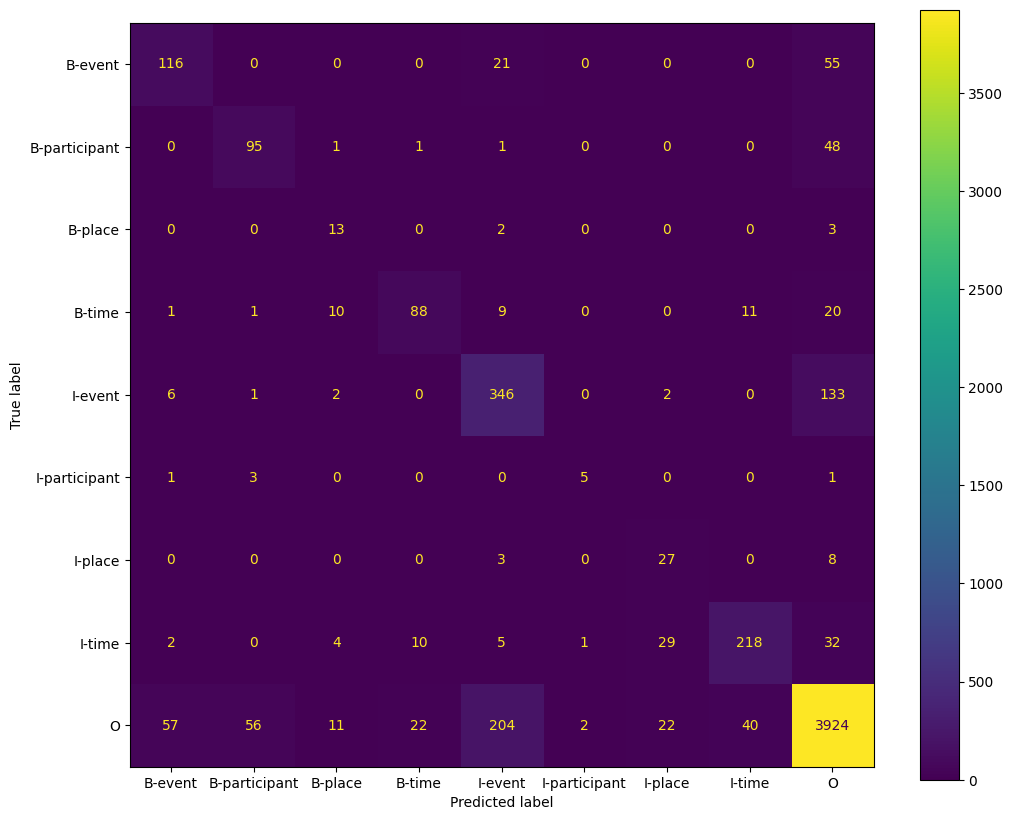

In [44]:
# Extract labels and predictions
labels = data_gold['label']
predictions = data_gpt['label']

# Classification report
report = classification_report(labels, predictions)
print("Classification Report:\n", report)

# Confusion matrix
conf_matrix = confusion_matrix(labels, predictions, labels=np.unique(labels))
print('Confusion matrix')
print(conf_matrix)

# Plot size
plot_size = plt.rcParams["figure.figsize"]
plot_size[0] = 12
plot_size[1] = 10
plt.rcParams["figure.figsize"] = plot_size 

# Display confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(labels))
display.plot()

## 3.3 Evaluate the test set using improve prompts

### 3.3.1 Apply the improved prompt on test set

In [74]:
test_file = './response_data/resized_files/test.tsv'
data_with_id = utils.tsv_add_id(test_file)

output_file = f"./response_data/files_with_id/test_improved.tsv"


df = pd.DataFrame(data_with_id, columns=['conversation', 'sent_id', 'token_id', 'token'])
df.to_csv(output_file, sep='\t', index=False)

conversation_list = utils.extract_conversations(output_file)

activity_dict = gpt_label_zeroshot(conversation_list, MODEL = "gpt-4o")

# Remove empty rows from the DataFrame
df = df[df['conversation'] != '']
# Add a label column to the DataFrame, and initialize it with 'O'
df['event1']= 'O'
df['event2']= 'O'
df['event3']= 'O'
df['event4']= 'O'
df['event5']= 'O'


df = utils.get_label(df, activity_dict)
output_file = f"./response_data/dataset/test_improved_gpt_4o_labelled.tsv"
df.to_csv(output_file, sep='\t', index=False)

Processing conversation 1/54
Processing conversation 2/54
Processing conversation 3/54
Processing conversation 4/54
Processing conversation 5/54
Processing conversation 6/54
Processing conversation 7/54
Processing conversation 8/54
Processing conversation 9/54
Processing conversation 10/54
Processing conversation 11/54
Processing conversation 12/54
Processing conversation 13/54
Processing conversation 14/54
Processing conversation 15/54
Processing conversation 16/54
Processing conversation 17/54
Processing conversation 18/54
Processing conversation 19/54
Processing conversation 20/54
Processing conversation 21/54
Processing conversation 22/54
Processing conversation 23/54
Processing conversation 24/54
Processing conversation 25/54
Processing conversation 26/54
Processing conversation 27/54
Processing conversation 28/54
Processing conversation 29/54
Processing conversation 30/54
Processing conversation 31/54
Processing conversation 32/54
Processing conversation 33/54
Processing conversa

### 3.3.2 Evaluation on test set

In [79]:
# Read the data
gpt_test_file = "./response_data/dataset/test_improved_gpt_4o_labelled.tsv"
processed_gpt_test_file = "./response_data/dataset/test_improved_gpt_4o_labelled_processed.tsv"
gold_test_file = './response_data/dataset/annotation_test_processed.tsv'

# Read the TSV file
data = pd.read_csv(gpt_test_file, delimiter='\t', encoding='utf-8')

# Get all 'event' columns
event_columns = [col for col in data.columns if col.startswith('event')]

# Define a function to calculate the new column 'label'
def process_label(row):
    events = row[event_columns].tolist()
    for event in events:
        if event != 'O':
            return event
    return 'O'

# Apply the function to create the new column 'label'
data['label'] = data.apply(process_label, axis=1)

# Fill NaN values in the 'label' column with 'O'
data['label'] = data['label'].fillna('O')

data.columns = data.columns.str.strip()

# Save to a new tsv file
result = data[['conversation', 'sent_id', 'token_id', 'token', 'label']]
result.to_csv(processed_gpt_test_file, sep='\t', index=False, encoding='utf-8')

data_gold = pd.read_csv(gold_test_file, delimiter='\t', encoding='utf-8')
data_gpt = pd.read_csv(processed_gpt_test_file, delimiter='\t', encoding='utf-8')


data_gpt['label'] = data_gpt['label'].str.replace(' ', '')


In [80]:
# Correct typos (participants -> participant)
data_gpt['label'] = data_gpt['label'].replace({
    'B-participants': 'B-participant',
    'I-participants': 'I-participant'
})


Classification Report:
                precision    recall  f1-score   support

      B-event       0.68      0.69      0.68       193
B-participant       0.72      0.75      0.73       161
      B-place       0.44      0.64      0.52        22
       B-time       0.80      0.76      0.78       135
      I-event       0.70      0.78      0.73       544
I-participant       0.57      0.44      0.50         9
      I-place       0.46      0.74      0.56        42
       I-time       0.81      0.82      0.81       288
            O       0.95      0.93      0.94      4801

     accuracy                           0.89      6195
    macro avg       0.68      0.73      0.70      6195
 weighted avg       0.90      0.89      0.89      6195

Confusion matrix
[[ 133    0    0    0   13    0    0    0   47]
 [   0  120    0    0    1    1    0    0   39]
 [   0    0   14    0    1    0    3    0    4]
 [   0    0    4  102   10    0    0    3   16]
 [  14    0    2    4  422    0    5    4   93]
 

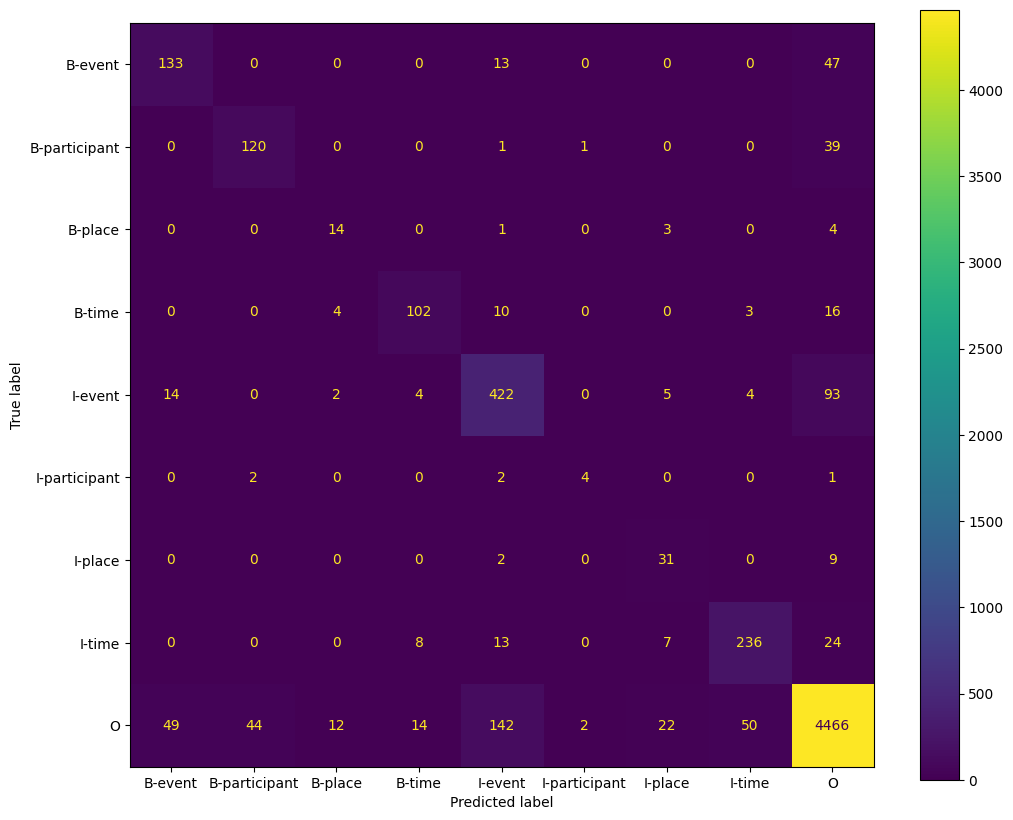

In [81]:
# Extract labels and predictions
labels = data_gold['label']
predictions = data_gpt['label']

# Classification report
report = classification_report(labels, predictions)
print("Classification Report:\n", report)

# Confusion matrix
conf_matrix = confusion_matrix(labels, predictions, labels=np.unique(labels))
print('Confusion matrix')
print(conf_matrix)

# Plot size
plot_size = plt.rcParams["figure.figsize"]
plot_size[0] = 12
plot_size[1] = 10
plt.rcParams["figure.figsize"] = plot_size 

# Display confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(labels))
display.plot()